(content:chapter:nodal)=

# Nodal Analysis

In [1]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Nodal Analysis is another methodical application of KVL, KCL, and Ohm's law that allow use to analyze any circuit. Nodal Analysis has a key advantage over Mesh Analysis but in general students become comfortable with one method or the other. The advantage Nodal Analysis has is the ease of locating the unknowns. This is true for humans and computers. Most circuit simulation software uses Nodal Analysis since it is easier to see where components connect (nodes) rather than closed paths with no intermediate branches. This becomes particularly true when analyzing circuits with ideal operational amplifiers, as we will do in this chapter.

## The Steps

I'm going to list the steps here as reference. Use these steps as we walk through the next example.

```{admonition} Steps for Nodal Analysis
1. Label the non-reference nodes and a current direction for each passive circuit element.
1. Use KCL on each non-reference node.
1. Use Ohm's law to express the resistor currents in terms of node voltages.
1. Distribute and group like terms.
1. Plug in values and solve the system.
```

These steps give us a starting point for the first example. We'll develop what to do with special circumstances in more complex circuits.

## Our First Toy Problem

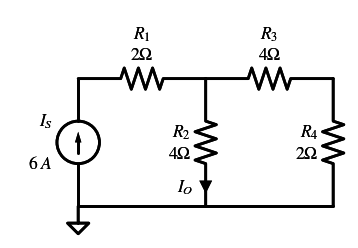

In [2]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-first-toy-problem-1.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.SourceI().label(['$6~A$', '$I_S$'])
    d += elm.Resistor().right().label('$R_1$\n$2\Omega$')
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n$4\Omega$'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$I_O$')
    d.pop()
    d += elm.Resistor().right().label('$R_3$\n$4\Omega$')
    d += elm.Resistor().down().label('$R_4$\n$2\Omega$')
    d += elm.Line().left().length(6)

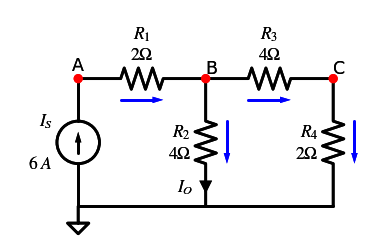

In [3]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-first-toy-problem-2.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.SourceI().label(['$6~A$', '$I_S$']).label('A', loc='right')
    d += elm.Dot().color('red')
    d += (R1 := elm.Resistor().right().label('$R_1$\n$2\Omega$').label('B', loc='right', ofst=(0,0.25)) )
    d += elm.Dot().color('red')
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n$4\Omega$'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$I_O$')
    d.pop()
    d += (R3 := elm.Resistor().right().label('$R_3$\n$4\Omega$').label('C', loc='right', ofst=(0,0.25)) )
    d += elm.Dot().color('red')
    d += (R4 := elm.Resistor().down().label('$R_4$\n$2\Omega$'))
    d += elm.Line().left().length(6)
    d.move_from(R1.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R2.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R3.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R4.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')

`````{admonition} Example

Find $I_O$ using Nodal Analysis.
```{figure} nodal-first-toy-problem-1.svg
---
height: 300px
name: nodal-first-toy-problem-1
---
```

````{admonition} Solution
:class: tip, dropdown
Start by labeling the non-reference nodes as shown below. Pick a current direction for each passive component. For this problem that means the resistors. In future problems we'll also label current directions for the other passive elements, the capacitors and inductors. These current arrows will help us keep the signs consistent in the system of equations we're about to develop to find the unknowns.

```{figure} nodal-first-toy-problem-2.svg
---
height: 300px
name: nodal-first-toy-problem-2.svg
---
```
**KCL for Node A**

Each term in a KCL must be a current. In the case of node A there will be two terms since two circuit elements are connected to it. The first term I'll write is the current through $I_S$. This term is a constant current and the simplest term we will encounter in Nodal Analysis.

The second term takes the form that we practice in the earlier section of this chapter. This term will be the current through $R_1$. And of course, we set it equal to zero and Kirchhoff instructed.

$$
 I_S-I_{R1}=0
$$


Notice the sign of each term. The $I_S$ term is positive since the current is entering node A. This arrow was not our choice. It is simply taken from the direction of the arrow with in the current supply symbol.

The second term is negative. The arrow we drew for $I_{R1}$ is leaving node A leading to the negative sign. This is the term that we will need to rewrite to be in terms of the unknown node voltages. Stop and look at the schematic to figure out which node is at the tail of the arrow. Now find the node connected to the tip of the arrow. I'm hope you identified Node A at the tail and Node B at the tip. Using the voltages at the nodes with respect to ground we can write an expression for the current through $R_1$

$$
I_{R1}=\frac{V_A-V_B}{R_1}
$$

We then substitute this expression into the KCL we wrote above.

$$
 I_S-\frac{V_A-V_B}{R_1}=0
$$

Notice that the sign front of the second term remains negative. In order to group like terms we will break up the fraction

$$
 I_S-\left[\frac{V_A}{R_1}-\frac{V_B}{R_1}\right]=0
$$

and distribute the sign from the KCL

$$
 I_S-\frac{1}{R_1}V_A+\frac{1}{R_1}V_B=0
$$

Moving the constant to the right hand side gives us

$$
-\frac{1}{R_1}V_A+\frac{1}{R_1}V_B=-I_S
$$

and plugging in values gives us

$$
-\frac{1}{2}V_A+\frac{1}{2}V_B=-6
$$

in a form we can use in the system of equations. We have constants and the unknown node voltages, nothing else. Any other variables will have to be dealt with. This example doesn't have any other variables but will will encounter them in future examples.

**KCL for Node B**

We follow the same process for node B. Node B has three elements connected to it. Therefore the KCL for this node will have three terms.

$$
I_{R1}-I_{R2}-I_{R3}=0
$$

$I_{R1}$ is the only current out of the three that is entering the node and therefore is the only positive term in this KCL. The other two currents are leaving node B and the corresponding terms are both negative.

All three currents follow the usual format, voltage at the tail minus voltage at the tip over the resistance. $I_{R1}$ and $I_{R3}$ will look similar to the term we substituted in the previous KCL equation.

$$
I_{R1}=\frac{V_A-V_B}{R_1}
$$


$$
I_{R3}=\frac{V_B-V_C}{R_3}
$$

In fact, the expression for $I_{R1}$ is identical to then one we wrote previously. The expression for $I_{R2}$ will end up looking a little different. Stop and find the voltages at the tail and tip of the arrow for $I_{R2}$. The voltage at the tail is $V_B$. The voltage at the tip is $0~\text{V}$. The tip of this arrow points to the ground node and the difference between this node and itself is $0~\text{V}$. We can include this $0~\text{V}$ in the expression

$$
I_{R2}=\frac{V_B-0}{R_2}
$$

but more often than not we exclude it as it is simply a subtraction by zero

$$
I_{R2}=\frac{V_B}{R_2}
$$

Substituting these expressions into the KCL gives us

$$
\frac{V_A-V_B}{R_1}-\frac{V_B}{R_2}-\frac{V_B-V_C}{R_3}=0
$$

Breaking up the fractions and distributing the signs leads to

$$
\frac{1}{R_1}V_A-\frac{1}{R_1}V_B-\frac{1}{R_2}V_B-\frac{1}{R_3}V_B+\frac{1}{R_3}V_C=0
$$

before grouping like terms

$$
\frac{1}{R_1}V_A+\left[-\frac{1}{R_1}-\frac{1}{R_2}-\frac{1}{R_3}\right]V_B+\frac{1}{R_3}V_C=0
$$

and plugging in values

$$
\frac{1}{2}V_A-V_B+\frac{1}{4}V_C=0
$$

We're finally done with this one. We're left with an equation with constants and the unknown node voltages, nothing more.

**KCL for Node C**

The last KCL we will write is for node C. Two elements are connected to node C, both resistors in this circuit. $I_{R3}$ is entering node C and therefore the term will be positive. $I_{R4}$ is leaving node C and therefore the term will be negative.

$$
I_{R3}-I_{R4}=0
$$

The expression for $I_{R3}$ matches what we wrote previously. $I_{R4}$ again has the tip of the arrow pointing at ground giving us the expression

$$
I_{R4}=\frac{V_C-0}{R_4}=\frac{V_C}{R_4}
$$

Substituting the two expressions into the KCL gives us

$$
\frac{V_B-V_C}{R_3}-\frac{V_C}{R_4}=0
$$

Breaking up the fractions and distributing the signs leads to

$$
\frac{1}{R_3}V_B-\frac{1}{R_3}V_C-\frac{1}{R_4}V_C=0
$$

before grouping like terms

$$
\frac{1}{R_3}V_B+\left[-\frac{1}{R_3}-\frac{1}{R_4}\right]V_C=0
$$

and plugging in values

$$
\frac{1}{4}V_B-\frac{3}{4}V_C=0
$$

And we're done with this one. Again, we're left with an equation with constants and the unknown node voltages, nothing more.

**Solving the system of equations**

We have three equations and three unknowns. Let's collect the equations from above here for easy reference.
\begin{eqnarray}
-\frac{1}{2}V_A+\frac{1}{2}V_B&=&-6\\
\frac{1}{2}V_A-V_B+\frac{1}{4}V_C&=&0\\
\frac{1}{4}V_B-\frac{3}{4}V_C&=&0
\end{eqnarray}
Be very careful transferring the coefficients to matrices as some terms have coefficients of zero and do not appear in the equations above.

$$
 \left[ \begin{array}{rrr}
-\frac{1}{2}&\frac{1}{2}&0\\
\frac{1}{2}&-1&\frac{1}{4}\\
0&\frac{1}{4}&-\frac{3}{4}
\end{array} \right]^{-1}\left[\begin{array}{r}-6\\0\\0\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}26.4~\text{V}\\14.4~\text{V}\\4.8~\text{V}\end{array}\right]
$$


**Using the Node Voltages to Find Other Values**

Once you know the node voltage you can find any other value in the circuit. Let's find $I_O$ for this example. $I_O$ is the current flowing down through $R_2$. The voltage across $R_2$ is the voltage at the tail of the current arrow, $V_B$ for this circuit, minus the voltage at the tip of the current arrow, ground ($0~\text{V}$) for this circuit. To find the current through the resistor we simply divide this voltage by the resistance.

$$
I_O=\frac{V_B-0}{R_2}=\frac{V_B}{R_2}=\frac{14.4~\text{V}}{4~\Omega}=3.6~\text{A}
$$


````
`````

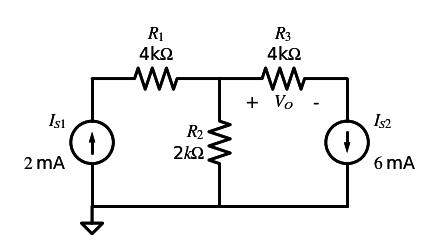

In [4]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-problem-2.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.SourceI().label(['$2~$mA', '$I_{S1}$'])
    d += (R1 := elm.Resistor().right().label('$R_1$\n4k$\Omega$') )
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n2$k\Omega$'))
    d.pop()
    d += (R3 := elm.Resistor().right().label('$R_3$\n4k$\Omega$').label(['+', '$V_O$', '-'], loc='bot'))
    d += elm.SourceI().label(['$I_{S2}$', '$6~$mA'], loc='bot').down()
    d += elm.Line().left().length(6)

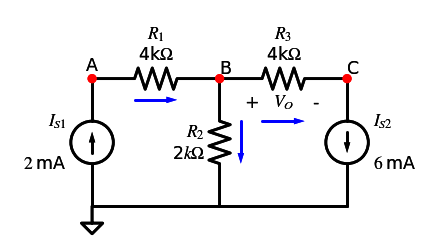

In [5]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-problem-2-current.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.SourceI().label(['$2~$mA', '$I_{S1}$']).label('A', loc='right')
    d += elm.Dot().color('red')
    
    d += (R1 := elm.Resistor().right().label('$R_1$\n4k$\Omega$').label('B', loc='right', ofst=(0,0.25))  )
    d += elm.Dot().color('red')    
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n2$k\Omega$'))
    d.pop()
    d += (R3 := elm.Resistor().right().label('$R_3$\n4k$\Omega$').label(['+', '$V_O$', '-'], loc='bot').label('C', loc='right', ofst=(0,0.25)))
    d += elm.Dot().color('red')    
    d += elm.SourceI().label(['$I_{S2}$', '$6~$mA'], loc='bot').down()
    d += elm.Line().left().length(6)
    d.move_from(R1.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R2.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R3.start, 1, -1)
    d += elm.Arrow().right().length(1).color('blue')

`````{admonition} Example

Find $V_O$ using Nodal Analysis.
```{figure} nodal-problem-2.svg
---
height: 300px
name: nodal-problem-2
---
```

````{admonition} Solution
:class: tip, dropdown
Begin by locating the non-reference nodes and labeling the current directions through the passive components.
```{figure} nodal-problem-2-current.svg
---
height: 300px
name: nodal-problem-2-current
---
```
We will now write a KCL equation for each non-reference node.

**KCL for Node A**


$$
I_{S1}-I_{R1}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
I_{S1}-\frac{V_A-V_B}{R_1}=0
$$

A bit of algebra give us an equation with values and unknown know voltages; suitable for inclusion in the system of equations

$$
-\frac{V_A}{R_1}+\frac{V_B}{R_1}=-I_{S1}
$$

or with values

$$
-\frac{1}{4k}V_A+\frac{1}{4k}V_B=-2~\text{mA}
$$


**KCL for Node B**


$$
I_{R1}-I_{R2}-I_{R3}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
\frac{V_A-V_B}{R_1}-\frac{V_B-0}{R_2}-\frac{V_B-V_C}{R_3}=0
$$

breaking up the fractions gives us

$$
\frac{V_A}{R_1}-\frac{V_B}{R_1}-\frac{V_B}{R_2}-\frac{V_B}{R_3}+\frac{V_C}{R_3}=0
$$

Gathering like terms yields

$$
\frac{1}{R_1}V_A+\left[-\frac{1}{R_1}-\frac{1}{R_2}-\frac{1}{R_3}\right]V_B+\frac{1}{R_3}V_C=0
$$

Substituting values leads to an equation suitable for inclusion in the system of equations

$$
\frac{1}{4k}V_A-\frac{1}{1k}V_B+\frac{1}{4k}V_C=0
$$


**KCL for Node C**


$$
I_{R3}-I_{S2}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
\frac{V_B-V_C}{R_3}-I_{S2}=0
$$

breaking up the fractions gives us

$$
\frac{V_B}{R_3}-\frac{V_C}{R_3}=I_{S2}
$$

Substituting values leads to an equation suitable for inclusion in the system of equations

$$
\frac{1}{4k}V_B-\frac{1}{4k}V_C=6~\text{mA}
$$


**Solve the System of Equations**

Let's gather the results of the three KCLs written above
\begin{alignat*}{3}
-\frac{1}{4k}V_A+&\frac{1}{4k}V_B&&=-2~\text{mA}\\
\frac{1}{4k}V_A-&\frac{1}{1k}V_B+\frac{1}{4k}V_C&&=0\\
&\frac{1}{4k}V_B-\frac{1}{4k}V_C&&=6~\text{mA}
\end{alignat*}
and put them in matrix form

$$
 \left[ \begin{array}{rrr}
-\frac{1}{4k}&\frac{1}{4k}&0\\
\frac{1}{4k}&-\frac{1}{1k}&\frac{1}{4k}\\
0&\frac{1}{4k}&-\frac{1}{4k}
\end{array} \right]^{-1}\left[\begin{array}{r}-2~\text{mA}\\0\\6~\text{mA}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}0~\text{V}\\-8~\text{V}\\-32~\text{V}\end{array}\right]
$$


**Find Other Values**

Using the node voltages we can now find other values in the circuit. In this case $V_O$ is found with

$$
V_{O}=V_B-V_C=-8-(-32)=24~\text{V}
$$

````
`````

## Nodal with Voltage Sources

Just as current sources create special cases for mesh analysis, voltage sources create special cases for Nodal analysis. We will write a KVL for each voltage supply in a circuit we are analyzing with nodal analysis. The rest of the equations in the system will be KCLs. These special cases are divided into two categories: 1) a voltage supply connecting a non-reference node and ground and 2) a voltage supply connecting two non-reference nodes. These next sections describe how to analyze circuits in these two categories using nodal analysis.

### Voltage Sources Connected to Ground

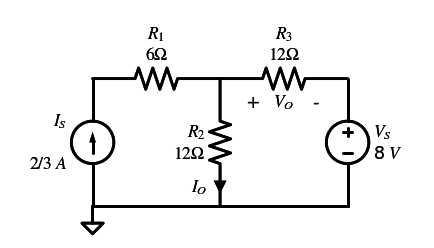

In [6]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-voltage-source-connected-to-ground.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.SourceI().label(['$2/3~A$', '$I_S$'])
    d += (R1 := elm.Resistor().right().label('$R_1$\n$6\Omega$') )
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n$12\Omega$'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$I_O$')
    d.pop()
    d += (R3 := elm.Resistor().right().label('$R_3$\n$12\Omega$').label(['+', '$V_O$', '-'], loc='bot'))
    d += elm.SourceV().label('$V_S$\n8$~V$', loc='bot').down().reverse()
    d += elm.Line().left().length(6)

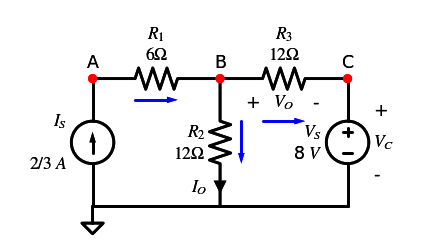

In [7]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-voltage-source-connected-to-ground-nodes.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.SourceI().label(['$2/3~A$', '$I_S$'])
    d += elm.Dot(color='red').label('A', loc='top', color='black')
    d += (R1 := elm.Resistor().right().label('$R_1$\n$6\Omega$') )
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n$12\Omega$'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$I_O$')
    d.pop()
    d += elm.Dot(color='red').label('B', loc='top', color='black')
    d += (R3 := elm.Resistor().right().label('$R_3$\n$12\Omega$').label(['+', '$V_O$', '-'], loc='bot'))
    d += elm.Dot(color='red').label('C', loc='top', color='black')
    d += elm.SourceV().label('$V_S$\n8$~V$', loc='top').down().reverse().label(['+', '$V_C$', '-'], loc='bot')
    d += elm.Line().left().length(6)
    d.move_from(R1.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R2.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R3.start, 1, -1)
    d += elm.Arrow().right().length(1).color('blue')

`````{admonition} Example

Find $V_O$ and $I_O$ using Nodal Analysis.
```{figure} nodal-voltage-source-connected-to-ground.svg
---
height: 300px
name: nodal-voltage-source-connected-to-ground
---
```
````{admonition} Solution
:class: tip, dropdown
Begin by locating the non-reference nodes and labeling the current directions through the passive components. This step does not change due to the presence of the voltage supply.
```{figure} nodal-voltage-source-connected-to-ground-nodes.svg
---
height: 300px
name: nodal-voltage-source-connected-to-ground-nodes
---
```
The three non-reference node voltages are the unknown and require a system of three equations to find the solution. The presence of $V_S$ in the circuit leads us to write a KVL for node C. The other two equations will be KCLs written for nodes A and B.

I'll start with the KVL since it is the equation receiving special treatment in this example. The other two equations are written in a manner similar to the previous examples.

**KVL for Node C**

I've labeled $V_C$ on the annotated schematic above. I'll start by writing the KVL as we have in the past. Then I'll demonstrate a fast way to get the KVL right without having to think about the loop for the KVL.

We start at the ground node and move across $V_S$. Next we move across $V_C$ back to ground. This small loop gives us the KVL equation

$$
8-V_C=0
$$

We rearrange the equation to have the unknowns on the left and constants on the right as we have before

$$
V_C=8
$$

This equation is ready for the system of equations. It contains only constants and the unknowns.

Now let's look at another way to write the equation that will work for any KVL we write during nodal analysis. Anytime there is a voltage supply we can look for the node connected to the positive side of the supply ($V_C$ in this case) and the node connected to the negative side (ground, or $0~\text{V}$, in this case). The node voltages are added together assuming the sign of the voltage polarity is it connected to. The right hand side of the equation is whatever the supply value is labeled as. For this example the equations is

$$
V_C-0=8
$$

which can be easily simplified to

$$
V_C=8
$$

the same result as we got above. I like this approach because it will work for any voltage in the circuit. The voltage supply does not need to be connected to ground. The voltage supply could be a dependent source. It works for any labeled voltage in a circuit even if it's across multiple components.

**KCL for Node A**

This KCL is straightforward if you are comfortable with the previous examples of nodal analysis.

$$
I_{S}-I_{R1}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
I_{S1}-\frac{V_A-V_B}{R_1}=0
$$

A bit of algebra give us an equation with values and unknown know voltages; suitable for inclusion in the system of equations

$$
-\frac{V_A}{R_1}+\frac{V_B}{R_1}=-I_{S1}
$$

or with values

$$
-\frac{1}{6}V_A+\frac{1}{6}V_B=-\frac{2}{3}~\text{A}
$$


**KCL for Node B**


$$
I_{R1}-I_{R2}-I_{R3}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
\frac{V_A-V_B}{R_1}-\frac{V_B-0}{R_2}-\frac{V_B-V_C}{R_3}=0
$$

breaking up the fractions gives us

$$
\frac{V_A}{R_1}-\frac{V_B}{R_1}-\frac{V_B}{R_2}-\frac{V_B}{R_3}+\frac{V_C}{R_3}=0
$$

Gathering like terms yields

$$
\frac{1}{R_1}V_A+\left[-\frac{1}{R_1}-\frac{1}{R_2}-\frac{1}{R_3}\right]V_B+\frac{1}{R_3}V_C=0
$$

Substituting values leads to an equation suitable for inclusion in the system of equations

$$
\frac{1}{6}V_A-\frac{1}{3}V_B+\frac{1}{12}V_C=0
$$


**Solve the System of Equations**

Let's gather the results of the three equations written above
\begin{alignat}{3}
&&V_C&=8~\text{V}\nonumber\\
-\frac{1}{6}V_A+&\frac{1}{6}V_B&&=-\frac{2}{3}~\text{A}\nonumber\\
\frac{1}{6}V_A-&\frac{1}{3}V_B+&\frac{1}{12}V_C&=0~\text{A}\nonumber
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrr}
0&0&1\\
-\frac{1}{6}&\frac{1}{6}&0\\
\frac{1}{6}&-\frac{1}{3}&\frac{1}{12}
\end{array} \right]^{-1}\left[\begin{array}{r}8~\text{V}\\-\frac{2}{3}~\text{A}\\0~\text{A}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}12~\text{V}\\8~\text{V}\\8~\text{V}\end{array}\right]
$$


**Find Other Values**

Using the node voltages we can now find other values in the circuit. In this case $V_O$ is found with

$$
V_{O}=V_B-V_C=8-8=0~\text{V}
$$

and $I_O$ is found with

$$
I_{O}=\frac{V_B-0}{12}=\frac{2}{3}~\text{A}
$$

````
`````

### Voltage Sources Connected to Two Non-ground Nodes

When a voltage supply connects two non-reference nodes we call it a "supernode". We treat the voltage supply in a similar manner as the previous example. We write a KVL that includes that voltage supply. The problem we face is then writing a sufficient number of KCL equations to complete the system. Kirchhoff's Current law can be stated more broadly to address this problem. Rather than stating that the algebraic sum of current entering a **node** is zero, we say that the algebraic sum of currents entering a **bounded region** is zero. Therefore, we can draw the bounded region around the voltage supply including the two nodes it connects to and write a KCL for this "super node". Let's look at an example.

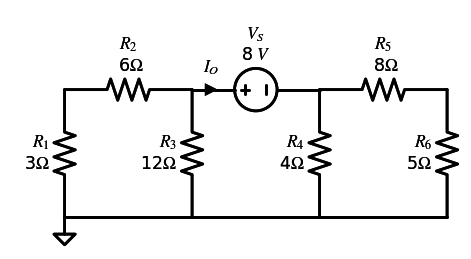

In [8]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='voltage-between-non-reference-nodes.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.Resistor().label('$R_1$\n 3$\Omega$').up()
    d += elm.Resistor().label('$R_2$\n 6$\Omega$').right()
    d.push()
    d += elm.Resistor().label('$R_3$\n 12$\Omega$').down()
    d.pop()
    d += (VS := elm.SourceV().label('$V_S$\n8$~V$').right().reverse())
    d += elm.CurrentLabelInline(direction='in', ofst=-0.6).at(VS.start).label('$I_O$')
    d.push()
    d += elm.Resistor().label('$R_4$\n 4$\Omega$').down()
    d.pop()
    d += elm.Resistor().label('$R_5$\n 8$\Omega$').right()
    d += elm.Resistor().label('$R_6$\n 5$\Omega$').down()
    d += elm.Line().left().length(9)

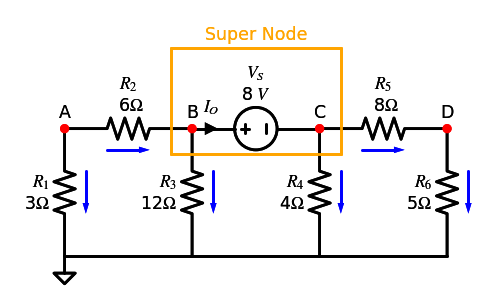

In [9]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='voltage-between-non-reference-nodes-currents.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += (R1 := elm.Resistor().label('$R_1$\n 3$\Omega$').up())
    d += elm.Dot(color='red').label('A', loc='top', color='black')
    d += (R2 := elm.Resistor().label('$R_2$\n 6$\Omega$').right())
    d += elm.Dot(color='red').label('B', loc='top', color='black')
    d.push()
    d += (R3 := elm.Resistor().label('$R_3$\n 12$\Omega$').down())
    d.pop()
    d += (VS := elm.SourceV().label('$V_S$\n8$~V$').right().reverse())
    d += elm.Dot(color='red').label('C', loc='top', color='black')
    d += elm.CurrentLabelInline(direction='in', ofst=-0.6).at(VS.start).label('$I_O$')
    d.push()
    d += (R4 := elm.Resistor().label('$R_4$\n 4$\Omega$').down())
    d.pop()
    d += (R5 := elm.Resistor().label('$R_5$\n 8$\Omega$').right())
    d += elm.Dot(color='red').label('D', loc='top', color='black')
    d += (R6 := elm.Resistor().label('$R_6$\n 5$\Omega$').down())
    d += elm.Line().left().length(9)
    d.move_from(R1.end, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R2.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R3.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R4.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R6.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R5.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R2.end, -0.5, -0.6)
    d += elm.Line().tox(R5.start + 0.5).color('orange')
    d += elm.Line().up().color('orange').length(2.5)
    d += elm.Line().left().color('orange').length(4).label('Super Node')
    d += elm.Line().down().color('orange').length(2.5)

`````{admonition} Example

Find $I_O$ using nodal analysis
```{figure} voltage-between-non-reference-nodes.svg
---
height: 300px
name: voltage-between-non-reference-nodes
---
```

````{admonition} Solution
:class: tip, dropdown
We start by looking for non-reference nodes and labeling current directions as before. I'll also draw the bounded region that forms the super node.
```{figure} voltage-between-non-reference-nodes-currents.svg
---
height: 300px
name: voltage-between-non-reference-nodes-currents
---
```

The circuit has four non-reference nodes meaning we will write four equations. We write one KVL since there is one voltage source. The rest of the equations, three in this case, are KCLs. Since there is a super node in this circuit one of the KCLs will be written for that super node.

**KVL for $V_S$**

Let's start with the KVL equation. We write this KVL in a similar manner to the previous example. Here are the questions I ask myself when writing a KVL in this context:

 * Which node is connected to the **positive** side of the source? **Node B**
 * Which node is connected to the **negative** side of the source? **Node C**
 * What is the voltage source value? $8~\text{V}$

The answers given are specific to this example but the questions are common for all KVLs written during nodal analysis. This leads to the KVL equation

$$
V_B-V_C=8
$$


**KCL for Super-node (B and C)**

This is the equation in the example that is a little different from what we've done previously. Look at the bounded region in the annotated schematic above. How many currents flow in or out of that region? All four currents will be included in the KCL

$$
I_{R2}-I_{R3}-I_{R4}-I_{R5}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
\frac{V_A-V_B}{R_2}-\frac{V_B-0}{R_3}-\frac{V_C-0}{R_4}-\frac{V_C-V_D}{R_5}=0
$$

breaking up the fractions gives us

$$
\frac{V_A}{R_2}-\frac{V_B}{R_2}-\frac{V_B}{R_3}-\frac{V_C}{R_4}-\frac{V_C}{R_5}+\frac{V_D}{R_5}=0
$$

Gathering like terms yields

$$
\frac{1}{R_2}V_A+\left[-\frac{1}{R_2}-\frac{1}{R_3}\right]V_B+\left[-\frac{1}{R_4}-\frac{1}{R_5}\right]V_C+\frac{1}{R_5}V_D=0
$$

Substituting values leads to an equation suitable for inclusion in the system of equations

$$
\frac{1}{6}V_A-\frac{1}{4}V_B-\frac{3}{8}V_C+\frac{1}{8}V_D=0
$$


**KCL for Node A**

The next two equations are straightforward if you are comfortable with the previous examples of nodal analysis.

$$
-I_{R1}-I_{R2}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
-\frac{V_A-0}{R_1}-\frac{V_A-V_B}{R_2}=0
$$

A bit of algebra give us an equation with values and unknown know voltages; suitable for inclusion in the system of equations

$$
\left[-\frac{1}{R_1}-\frac{1}{R_2}\right]V_A+\frac{V_B}{R_2}=0
$$

or with values

$$
-\frac{1}{2}V_A+\frac{1}{6}V_B=0
$$


**KCL for Node D**

Last one!

$$
I_{R5}-I_{R6}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
\frac{V_C-V_D}{R_5}-\frac{V_D-0}{R_6}=0
$$

A bit of algebra give us an equation with values and unknown know voltages; suitable for inclusion in the system of equations

$$
\frac{V_C}{R_5}+\left[-\frac{1}{R_5}-\frac{1}{R_6}\right]V_D=0
$$

or with values

$$
\frac{1}{8}V_C-\frac{13}{40}V_D=0
$$


**Solve the System of Equations**

Let's gather the results of the four equations written above
\begin{alignat}{4}
~&~~\text{V}_B-&~\text{V}_C~~&~&=8\nonumber\\
\frac{1}{6}V_A-&\frac{1}{4}V_B-&\frac{3}{8}V_C+&\frac{1}{8}V_D&=0\nonumber\\
-\frac{1}{2}V_A+&\frac{1}{6}V_B&~&~&=0\nonumber\\
&&\frac{1}{8}V_C-&\frac{13}{40}V_D&=0\nonumber
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrrr}
0&1&-1&0\\
\frac{1}{6}&-\frac{1}{4}&-\frac{3}{8}&\frac{1}{8}\\
-\frac{1}{2}&\frac{1}{6}&0&0\\
0&0&\frac{1}{8}&-\frac{13}{40}\\
\end{array} \right]^{-1}\left[\begin{array}{r}8\\0\\0\\0\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\\V_D\end{array}\right]=\left[\begin{array}{r}1.67~\text{V}\\5.02~\text{V}\\-2.98~\text{V}\\-1.15~\text{V}\end{array}\right]
$$


**Find Other Values**

Now that we have the node voltages we can go find other values in the circuit. I chose $I_O$ through the voltage supply as we have not treated this type of value yet. The typical approach of using Ohm's law by finding the difference in node voltages and dividing by the resistance will not work here since we don't know the resistance of the voltage source. Since ohm's law will not work to find a current we'll rely on the other fundamental law that involves currents, KCL. We'll pick a node adjacent to $I_O$. We'll use node C, but node B would work just as well. Here is the KCL at node C including the term for $I_O$.

$$
I_O-I_{R4}-I_{R5}=0
$$

Now we use Ohm's law in a similar manner as previously, however, the node voltages are no longer unknowns.

$$
I_O-\frac{V_C-0}{R_4}-\frac{V_C-V_D}{R_5}=0
$$

Now we solve for $I_O$ and substitute the known values

$$
I_O=\frac{-2.98}{4}+\frac{-2.98-(-1.15)}{8}=-975.4~\text{mA}
$$


````

`````

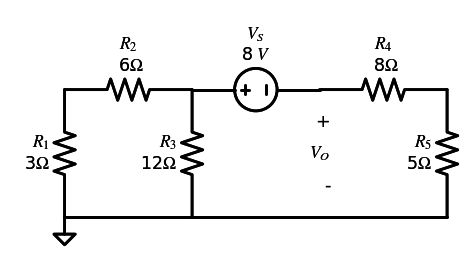

In [10]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='voltage-between-non-reference-nodes-2.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.Resistor().label('$R_1$\n 3$\Omega$').up()
    d += elm.Resistor().label('$R_2$\n 6$\Omega$').right()
    d.push()
    d += elm.Resistor().label('$R_3$\n 12$\Omega$').down().label(['+', '$V_O$', '-' ], ofst=(0,3.5))
    d.pop()
    d += (VS := elm.SourceV().label('$V_S$\n8$~V$').right().reverse())
    d.push()
    d.pop()
    d += elm.Resistor().label('$R_4$\n 8$\Omega$').right()
    d += elm.Resistor().label('$R_5$\n 5$\Omega$').down()
    d += elm.Line().left().length(9)

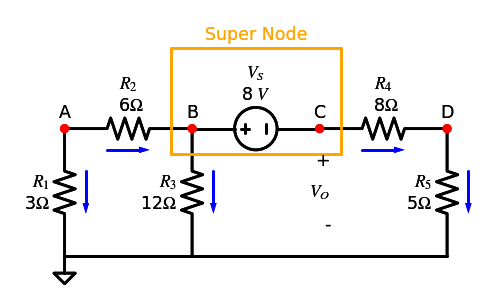

In [11]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='voltage-between-non-reference-nodes-2-currents.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += (R1:= elm.Resistor().label('$R_1$\n 3$\Omega$').up())
    d += elm.Dot(color='red').label('A', loc='top', color='black')
    d += (R2:= elm.Resistor().label('$R_2$\n 6$\Omega$').right())
    d += elm.Dot(color='red').label('B', loc='top', color='black')
    d.push()
    d += (R3 := elm.Resistor().label('$R_3$\n 12$\Omega$').down().label(['+', '$V_O$', '-' ], ofst=(0,3.5)))
    d.pop()
    d += (VS := elm.SourceV().label('$V_S$\n8$~V$').right().reverse())
    d += elm.Dot(color='red').label('C', loc='top', color='black')
    d.push()
    d.pop()
    d += (R4 := elm.Resistor().label('$R_4$\n 8$\Omega$').right())
    d += elm.Dot(color='red').label('D', loc='top', color='black')
    d += (R5 := elm.Resistor().label('$R_5$\n 5$\Omega$').down())
    d += elm.Line().left().length(9)
    d.move_from(R1.end, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R2.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R3.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R4.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R5.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R2.end, -0.5, -0.6)
    d += elm.Line().tox(R4.start + 0.5).color('orange')
    d += elm.Line().up().color('orange').length(2.5)
    d += elm.Line().left().color('orange').length(4).label('Super Node')
    d += elm.Line().down().color('orange').length(2.5)

`````{admonition} Example

Find $V_O$ using nodal analysis
```{figure} voltage-between-non-reference-nodes-2.svg
---
height: 300px
name: voltage-between-non-reference-nodes-2
---
```

````{admonition} Solution
:class: tip, dropdown
When I use this example in class there is a gotcha moment for about half the students. Count how many non-reference nodes before I label them in the next figure. If you said three, you're not alone. Many students miss the node in between $V_S$ and $R_4$. There are, in fact, four non-reference nodes. I'll label them below along with the usual notations. There is also a voltage supply leading us to write a KVL for one equation instead of
a KCL. Lastly, that voltage supply connects two non-reference nodes forming a super-node. One of the KCL equations will be written for the bounded region that encloses the two nodes connect to the voltage supply.

Here is the schematic as I would annotate it prior to writing the system of equations for analysis
```{figure} voltage-between-non-reference-nodes-2-currents.svg
---
height: 300px
name: voltage-between-non-reference-nodes-2-currents
---
```

**KVL for $V_S$**

Here are the questions I ask myself when writing a KVL in this context:

 * Which node is connected to the **positive** side of the source? **Node B**
 * Which node is connected to the **negative** side of the source? **Node C**
 * What is the voltage source value? $8~\text{V}$

The answers given are specific to this example but the questions are common for all KVLs written during nodal analysis. This leads to the KVL equation

$$
V_B-V_C=8
$$


**KCL for Super-node (B and C)**

Look at the bounded region in the annotated schematic above. How many currents flow in or out of that region? All three currents will be included in the KCL

$$
I_{R2}-I_{R3}-I_{R4}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
\frac{V_A-V_B}{R_2}-\frac{V_B-0}{R_3}-\frac{V_C-V_D}{R_4}=0
$$

breaking up the fractions gives us

$$
\frac{V_A}{R_2}-\frac{V_B}{R_2}-\frac{V_B}{R_3}-\frac{V_C}{R_4}+\frac{V_D}{R_4}=0
$$

Gathering like terms yields

$$
\frac{1}{R_2}V_A+\left[-\frac{1}{R_2}-\frac{1}{R_3}\right]V_B-\frac{1}{R_4}V_C+\frac{1}{R_4}V_D=0
$$

Substituting values leads to an equation suitable for inclusion in the system of equations

$$
\frac{1}{6}V_A-\frac{1}{4}V_B-\frac{1}{8}V_C+\frac{1}{8}V_D=0
$$


**KCL for Node A**

The next two equations are straightforward if you are comfortable with the previous examples of nodal analysis.

$$
-I_{R1}-I_{R2}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
-\frac{V_A-0}{R_1}-\frac{V_A-V_B}{R_2}=0
$$

A bit of algebra give us an equation with values and unknown know voltages; suitable for inclusion in the system of equations

$$
\left[-\frac{1}{R_1}-\frac{1}{R_2}\right]V_A+\frac{V_B}{R_2}=0
$$

or with values

$$
-\frac{1}{2}V_A+\frac{1}{6}V_B=0
$$


**KCL for Node D**

Last one!

$$
I_{R5}-I_{R6}=0
$$

and use Ohm's law where we can to rewrite the currents in terms of the node voltages

$$
\frac{V_C-V_D}{R_5}-\frac{V_D-0}{R_6}=0
$$

A bit of algebra give us an equation with values and unknown know voltages; suitable for inclusion in the system of equations

$$
\frac{V_C}{R_5}+\left[-\frac{1}{R_5}-\frac{1}{R_6}\right]V_D=0
$$

or with values

$$
\frac{1}{8}V_C-\frac{13}{40}V_D=0
$$


**Solve the System of Equations**

Let's gather the results of the four equations written above
\begin{alignat}{4}
~&~~\text{V}_B-&~\text{V}_C~~&~&=8\nonumber\\
\frac{1}{6}V_A-&\frac{1}{4}V_B-&\frac{1}{8}V_C+&\frac{1}{8}V_D&=0\nonumber\\
-\frac{1}{2}V_A+&\frac{1}{6}V_B&~&~&=0\nonumber\\
&&\frac{1}{8}V_C-&\frac{13}{40}V_D&=0\nonumber
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrrr}
0&1&-1&0\\
\frac{1}{6}&-\frac{1}{4}&-\frac{1}{8}&\frac{1}{8}\\
-\frac{1}{2}&\frac{1}{6}&0&0\\
0&0&\frac{1}{8}&-\frac{13}{40}\\
\end{array} \right]^{-1}\left[\begin{array}{r}8\\0\\0\\0\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\\V_D\end{array}\right]=\left[\begin{array}{r}755.9~\text{mV}\\2.268~\text{V}\\-5.732~\text{V}\\-2.205~\text{V}\end{array}\right]
$$



**Find Other Values**

Now that we have the node voltages we can go find other values in the circuit. If that value is a voltage look for the node on the positive side of the voltage, $V_C$ in this case. Subtract from that the node voltage on the negative side, ground in this case. Here it is as an equation

$$
V_O=V_C-0=-5.732-0=-5.732~\text{V}
$$

The negative side won't always be connected to ground as it is here. In that case the second term will be non-zero but the form of the equation does not change.

````
`````

### Nodal Analysis with Dependent Supplies

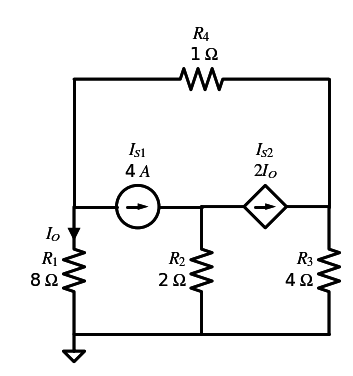

In [12]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-analysis-with-dependent-supplies.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += elm.Resistor().up().label('$R_1$\n 8$~\Omega$')
    d += elm.CurrentLabelInline(direction='out', ofst=0.5).at(R1.end).label('$I_O$')
    d.push()
    d += elm.SourceI().right().label('$I_{S1}$\n4$~A$')
    d.push()
    d += elm.Resistor().down().label('$R_2$\n 2$~\Omega$')
    d.pop()
    d += elm.SourceControlledI().right().label('$I_{S2}$\n$2I_O$')
    d += (R3 := elm.Resistor().down().label('$R_3$\n 4$~\Omega$'))
    d += elm.Line().left().length(6)
    d.pop()
    d += elm.Line().up()
    d += elm.Resistor().right().label('$R_4$\n 1$~\Omega$').length(6)
    d += elm.Line().down()

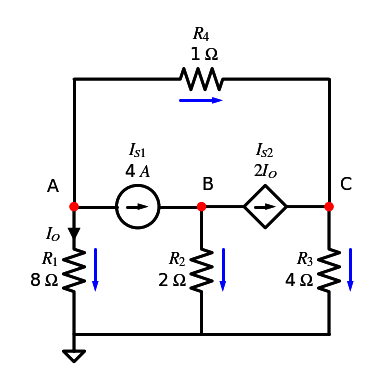

In [13]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-analysis-with-dependent-supplies-currents.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d.pop()
    d += (R1 := elm.Resistor().up().label('$R_1$\n 8$~\Omega$').label('A', loc='right', ofst=(0.25,0.5)))
    d += elm.Dot().color('red')
    d += elm.CurrentLabelInline(direction='out', ofst=0.5).at(R1.end).label('$I_O$')
    d.push()
    d += elm.SourceI().right().label('$I_{S1}$\n4$~A$').label('B', loc='right', ofst=(0,0.5))
    d += elm.Dot().color('red')
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n 2$~\Omega$'))
    d.pop()
    d += elm.SourceControlledI().right().label('$I_{S2}$\n$2I_O$').label('C', loc='right', ofst=(0.25,0.5))
    d += elm.Dot().color('red')
    d += (R3 := elm.Resistor().down().label('$R_3$\n 4$~\Omega$'))
    d += elm.Line().left().length(6)
    d.pop()
    d += elm.Line().up()
    d += (R4 := elm.Resistor().right().label('$R_4$\n 1$~\Omega$').length(6))
    d += elm.Line().down()
    d.move_from(R1.end, 0.5,-1)
    d += elm.Arrow().down().color('blue').length(1)
    d.move_from(R2.start, 0.5,-1)
    d += elm.Arrow().down().color('blue').length(1)  
    d.move_from(R3.start, 0.5,-1)
    d += elm.Arrow().down().color('blue').length(1)    
    d.move_from(R4.start, 2.5,-0.5)
    d += elm.Arrow().right().color('blue').length(1)        

`````{admonition} Example

Find $I_O$ using nodal analysis.
```{figure} nodal-analysis-with-dependent-supplies.svg
---
height: 300px
name: nodal-analysis-with-dependent-supplies
---
```

````{admonition} Solution
:class: tip, dropdown
There are no voltage supplies in this circuit so all of the equations will be KCL equations. There are three non-reference nodes so there will be three KCL equations. The difference in this problem is the presence of the dependent current source $I_{S2}$. We'll write an expression for the control variable, $I_O$ in this case. Here is the annotated schematic:
```{figure} nodal-analysis-with-dependent-supplies-currents.svg
---
height: 300px
name: nodal-analysis-with-dependent-supplies-currents
---
```

**Control Variable Expression**

We'll need this expression to relate the control variable to the unknown node voltages. Our goal when writing the system equations is to have equations that are comprised of constants and the unknown variables. The presence of a control variable in the system is address by substituting with this expression.

This expression is always written using the direction indicated on the schematic, not with your chosen direction during annotation of the schematic. In this case, $V_A$ is at the tail of the arrow, ground ($0~\text{V}$) is at the tip, and the current flows through $R_1$.

$$
I_O=\frac{V_A-0}{R_1}=\frac{V_A}{R_1}
$$


**KCL for Node A**

The KCL equation for node A is similar to previous examples since it does not involve the dependent supply. We start with the three currents entering or leaving that node

$$
-I_{R1}-I_{S1}-I_{R4}=0
$$

Use KVL and Ohm's law to rewrite the equation in terms of the unknown node voltages

$$
-\frac{V_A-0}{R_1}-I_{S1}-\frac{V_A-V_C}{R_4}=0
$$

A bit of algebra give us an equation with values and unknown know voltages; suitable for inclusion in the system of equations

$$
\left[-\frac{1}{R_1}-\frac{1}{R_4}\right]V_A+\frac{V_C}{R_4}=I_{S1}
$$

or with values

$$
-\frac{9}{8}V_A+V_C=4~\text{A}
$$


**KCL for Node B**

Node B involves the dependent supply so we will use the expression for the control variable we wrote earlier. Other than that substitution, we approach the KCL equation in the same manner. We start with the three currents entering or leaving the node

$$
I_{S1}-I_{R2}-I_{S2}=0
$$

Use KVL and Ohm's law to rewrite the equation in terms of the unknown node voltages. I've also replaced $I_{S2}$ with the gain and control variable for that supply

$$
I_{S1}-\frac{V_B-0}{R_2}-2I_{O}=0
$$

We need to get rid of the control variable. To do so, we substitute the expression for the control variable in terms of the unknown node voltages

$$
I_{S1}-\frac{V_B-0}{R_2}-2\left[\frac{V_A}{R_1}\right]=0
$$

Now that we have an equation comprised only of constants and unknown node voltages we can do some algebra to group like terms

$$
-\frac{2}{R_1}V_A-\frac{V_B}{R_2}=-I_{S1}
$$

and substitute values

$$
-\frac{1}{4}V_A-\frac{1}{2}V_B=-4~\text{A}
$$


**KCL for Node C**

Node B involves the dependent supply so we will use the expression for the control variable we wrote earlier. Other than that substitution, we approach the KCL equation in the same manner. We start with the three currents entering or leaving the node

$$
I_{R4}+I_{S2}-I_{R3}=0
$$

Use KVL and Ohm's law to rewrite the equation in terms of the unknown node voltages. I've also replaced $I_{S2}$ with the gain and control variable for that supply

$$
\frac{V_A-V_C}{R_4}+2I_{O}-\frac{V_C-0}{R_3}=0
$$

We need to get rid of the control variable. To do so, we substitute the expression for the control variable in terms of the unknown node voltages

$$
\frac{V_A-V_C}{R_4}+2\left[\frac{V_A}{R_1}\right]-\frac{V_C-0}{R_3}=0
$$

Now that we have an equation comprised only of constants and unknown node voltages we can do some algebra to group like terms

$$
\left[\frac{1}{R_4}+\frac{2}{R_1}\right]V_A+\left[-\frac{1}{R_3}-\frac{1}{R_4}\right]V_C=0
$$

and substitute values

$$
\frac{5}{4}V_A-\frac{5}{4}V_C=0
$$


**Solve the System of Equations**

Let's gather the results of the three equations written above
\begin{alignat}{3}
-\frac{9}{8}V_A&&+V_C&=4~\text{A}\nonumber\\
-\frac{1}{4}V_A&-\frac{1}{2}V_B&&=-4~\text{A}\nonumber\\
\frac{5}{4}V_A&&-\frac{5}{4}V_C&=0~\text{A}\nonumber
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrr}
-\frac{9}{8}&0&1\\
-\frac{1}{4}&-\frac{1}{2}&0\\
\frac{5}{4}&0&-\frac{5}{4}
\end{array} \right]^{-1}\left[\begin{array}{r}4~\text{A}\\-4~\text{A}\\0~\text{A}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}-32~\text{V}\\80~\text{V}\\-32~\text{V}\end{array}\right]
$$


**Find Other Values**

Since we're looking for $I_O$, an expression we've already used in this analysis, we simply use the node voltage values we just calculated in that same expression.

$$
I_O=\frac{V_A-0}{R_1}=\frac{-32~\text{V}}{8~\Omega}=-4~\text{A}
$$


````
`````

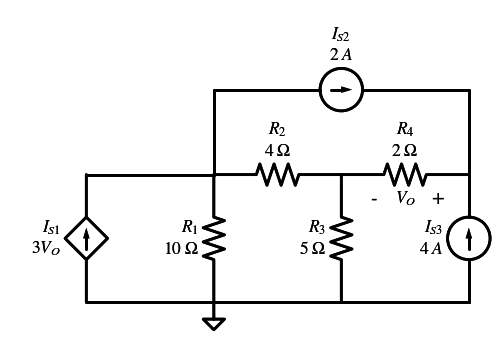

In [14]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-analysis-with-dependent-supplies-2.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d += elm.Line().left()
    d += elm.SourceControlledI().label('$I_{S1}$\n$3V_O$')
    d += elm.Line().right()#.label('A', loc='right', ofst=(0,0.5))
    d.push()
    d.push()
    d += elm.Resistor().down().label('$R_1$\n$10~\Omega$')
    d.pop()
    d += elm.Resistor().right().label('$R_2$\n$4~\Omega$')
    d.push()
    d += elm.Resistor().down().label('$R_3$\n$5~\Omega$')
    d.pop()
    d += elm.Resistor().right().label('$R_4$\n$2~\Omega$').label(['-','$V_O$','+'], loc='bot')
    d += elm.SourceI().down().label('$I_{S3}$\n$4~A$').reverse()
    d += elm.Line().left().length(6)
    d.pop()
    d += elm.Line().up().length(2)
    d += elm.SourceI().right().label('$I_{S2}$\n$2~A$').length(6)
    d += elm.Line().down().length(2)
    

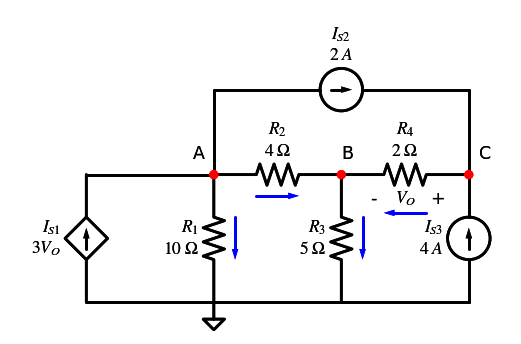

In [15]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-analysis-with-dependent-supplies-2-currents.svg') as d:
    d.push()
    d += elm.GroundSignal()
    d += elm.Line().left()
    d += elm.SourceControlledI().label('$I_{S1}$\n$3V_O$')
    d += elm.Line().right().label('A', loc='right', ofst=(-0.5,0.5))
    d += elm.Dot().color('red')
    d.push()
    d.push()
    d += (R1 := elm.Resistor().down().label('$R_1$\n$10~\Omega$'))
    d.pop()
    d += (R2 := elm.Resistor().right().label('$R_2$\n$4~\Omega$').label('B', loc='right', ofst=(0,0.5)))
    d += elm.Dot().color('red')
    d.push()
    d += (R3 := elm.Resistor().down().label('$R_3$\n$5~\Omega$'))
    d.pop()
    d += (R4 := elm.Resistor().right().label('$R_4$\n$2~\Omega$').label(['-','$V_O$','+'], loc='bot').label('C', loc='right', ofst=(0.25,0.5)))
    d += elm.Dot().color('red')
    d += elm.SourceI().down().label('$I_{S3}$\n$4~A$').reverse()
    d += elm.Line().left().length(6)
    d.pop()
    d += elm.Line().up().length(2)
    d += elm.SourceI().right().label('$I_{S2}$\n$2~A$').length(6)
    d += elm.Line().down().length(2)
    d.move_from(R1.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R2.start, 1 , -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(R3.start, 0.5, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(R4.end, -1 , -0.9)
    d += elm.Arrow().left().length(1).color('blue')

`````{admonition} Example

Find $V_O$ using nodal analysis
```{figure} nodal-analysis-with-dependent-supplies-2.svg
---
height: 300px
name: nodal-analysis-with-dependent-supplies-2
---
```

````{admonition} Solution
:class: tip, dropdown

```{figure} nodal-analysis-with-dependent-supplies-2-currents.svg
---
height: 300px
name: nodal-analysis-with-dependent-supplies-2-currents
---
```

**Control Variable Expression**


$$
V_O=V_C-V_B
$$

**KCL for node A**


$$
I_{S1}-I_{R1}-I_{R2}-I_{S2}=0
$$


$$
3V_O-\frac{V_A-0}{R_1}-\frac{V_A-V_B}{R_2}-I_{S2}=0
$$


$$
3\left(V_C-V_B\right)-\frac{V_A}{10}-\frac{V_A-V_B}{4}-2=0
$$


$$
\left[-\frac{1}{10}-\frac{1}{4}\right]V_A+\left[-3+\frac{1}{4}\right]V_B+3V_C=2
$$


$$
-\frac{7}{20}V_A-\frac{11}{4}V_B+3V_C=2
$$

**KCL for node B**


$$
I_{R2}-I_{R3}+I_{R4}=0
$$


$$
\frac{V_A-V_B}{R_2}-\frac{V_B-0}{R_3}+\frac{V_C-V_B}{R_4}=0
$$


$$
\frac{1}{R_2}V_A+\left[-\frac{1}{R_2}-\frac{1}{R_3}-\frac{1}{R_4}\right]V_B+\frac{1}{R_4}V_C=0
$$


$$
\frac{1}{4}V_A+\left[-\frac{1}{4}-\frac{1}{5}-\frac{1}{2}\right]V_B+\frac{1}{2}V_C=0
$$


$$
\frac{1}{4}V_A-\frac{19}{20}V_B+\frac{1}{2}V_C=0
$$

**KCL for node C**


$$
I_{S2}-I_{R4}+I_{S3}=0
$$


$$
I_{S2}-\frac{V_C-V_B}{R_4}+I_{S3}=0
$$


$$
2-\frac{V_C-V_B}{2}+4=0
$$


$$
-\frac{V_C-V_B}{2}=-6
$$


$$
\frac{1}{2}V_B-\frac{1}{2}V_C=-6
$$

**Solve the System of Equations**

Let's gather the results of the three equations written above
\begin{alignat}{3}
-\frac{7}{20}V_A&-\frac{11}{4}V_B&+3V_C&=2~\text{A}\nonumber\\
\frac{1}{4}V_A&-\frac{19}{20}V_B&+\frac{1}{2}V_C&=0~\text{A}\nonumber\\
&\frac{1}{2}V_B&-\frac{1}{2}V_C&=-6~\text{A}\nonumber%alignment
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrr}
-\frac{7}{20}&-\frac{11}{4}&3\\
\frac{1}{4}&-\frac{19}{20}&\frac{1}{2}\\
0&\frac{1}{2}&-\frac{1}{2}
\end{array} \right]^{-1}\left[\begin{array}{r}2~\text{A}\\0~\text{A}\\-6~\text{A}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}176.84~\text{V}\\111.58~\text{V}\\123.58~\text{V}\end{array}\right]
$$

**Find Other Values**


$$
V_O=V_C-V_B=123.58-111.58=12~\text{V}
$$


````
`````

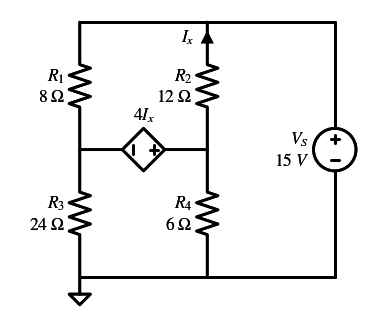

In [16]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-analysis-with-dependent-supplies-3.svg') as d:
    d += elm.GroundSignal()
    d += elm.Resistor().up().label('$R_3$\n$24~\Omega$')
    d.push()
    d += elm.Resistor().up().label('$R_1$\n$8~\Omega$')
    d += elm.Line().right()
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n$12~\Omega$'))
    d += elm.CurrentLabelInline(direction='out', ofst=-0.5).at(R2.start).label('$I_x$')
    d += (R4 := elm.Resistor().down().label('$R_4$\n$6~\Omega$'))
    d += elm.Line().left()
    d.pop()
    d += elm.Line().right()
    d += elm.SourceV().label('$V_S$\n$15~V$').down().reverse().length(6)
    d += elm.Line().left()
    d.pop()
    d += elm.SourceControlledV().right().label('$4I_x$')

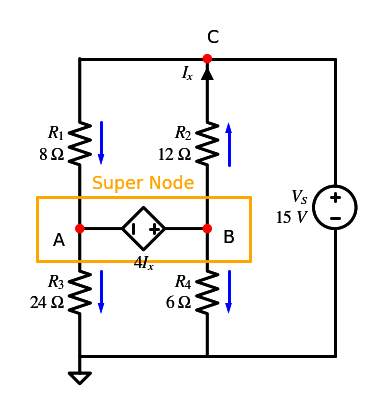

In [17]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-analysis-with-dependent-supplies-3-currents.svg') as d:
    d += elm.GroundSignal()
    d += (R3 := elm.Resistor().up().label('$R_3$\n$24~\Omega$').label('A', loc='right', ofst=(-0.5,0.5)))
    d += elm.Dot().color('red')
    d.push()
    d += (R1 := elm.Resistor().up().label('$R_1$\n$8~\Omega$').length(4))
    d += elm.Line().right().label('C', loc='right', ofst=(0,0.5))
    d += elm.Dot().color('red')
    d.push()
    d += (R2 := elm.Resistor().down().label('$R_2$\n$12~\Omega$').label('B', loc='left', ofst=(0,0.5)).length(4))
    d += elm.Dot().color('red')
    d += elm.CurrentLabelInline(direction='out', ofst=-0.5).at(R2.start).label('$I_x$')
    d += (R4 := elm.Resistor().down().label('$R_4$\n$6~\Omega$'))
    d += elm.Line().left()
    d.pop()
    d += elm.Line().right()
    d += elm.SourceV().label('$V_S$\n$15~V$').down().reverse().length(7)
    d += elm.Line().left()
    d.pop()
    d += elm.SourceControlledV().right().label('$4I_x$', loc='bot')
    d.move_from(R1.end, 0.5, -1.5)
    d += elm.Arrow().color('blue').length(1).down()
    d.move_from(R3.end, 0.5, -1)
    d+= elm.Arrow().color('blue').length(1).down()
    d.move_from(R2.end, 0.5, 1.5)
    d += elm.Arrow().color('blue').length(1).up()
    d.move_from(R4.end, 0.5, 2)
    d += elm.Arrow().color('blue').length(1).down()
    d.move_from(R1.start,-1,0.75)
    d += elm.Line().color('orange').length(1.5)
    d += elm.Line().color('orange').length(5).right()
    d += elm.Line().color('orange').length(1.5).up()
    d += elm.Line().color('orange').length(5).left().label('Super Node')

`````{admonition} Example

Find $I_x$ using nodal analysis.
```{figure} nodal-analysis-with-dependent-supplies-3.svg
---
height: 300px
name: nodal-analysis-with-dependent-supplies-3
---
```

````{admonition} Solution
:class: tip, dropdown
```{figure} nodal-analysis-with-dependent-supplies-3-currents.svg
---
height: 300px
name: nodal-analysis-with-dependent-supplies-3-currents
---
```

**Control Variable Expression**


$$
I_x=\frac{V_B-V_C}{R_2}
$$


**KVL for super-node (A and B)**


$$
V_B-V_A=4I_x
$$


$$
V_B-V_A=4\frac{V_B-V_C}{R_2}
$$


$$
V_B-V_A-4\frac{V_B-V_C}{R_2}=0
$$


$$
-V_A+\left[1-\frac{4}{R_2}\right]V_B+\frac{4}{R_2}V_C=0
$$


$$
-V_A+\left[1-\frac{4}{12}\right]V_B+\frac{4}{12}V_C=0
$$


$$
-V_A-\frac{2}{3}V_B+\frac{1}{3}V_C=0
$$


**KCL for super-node (A and B)**


$$
I_{R1}-I_{R2}-I_{R3}-I_{R4}=0
$$


$$
\frac{V_C-V_A}{R_1}-\frac{V_B-V_C}{R_2}-\frac{V_A-0}{R_3}-\frac{V_B-0}{R_4}=0
$$


$$
\left[-\frac{1}{R_1}-\frac{1}{R_3}\right]V_A+\left[-\frac{1}{R_2}-\frac{1}{R_4}\right]V_B+\left[\frac{1}{R_1}+\frac{1}{R_2}\right]V_C=0
$$


$$
\left[-\frac{1}{8}-\frac{1}{24}\right]V_A+\left[-\frac{1}{12}-\frac{1}{6}\right]V_B+\left[\frac{1}{8}+\frac{1}{12}\right]V_C=0
$$


$$
-\frac{1}{6}V_A-\frac{1}{4}V_B+\frac{5}{24}V_C=0
$$


**KVL for node C**


$$
V_C-0=V_S
$$


$$
V_C=15~\text{V}
$$


**Solve the System of Equations**

Let's gather the results of the three equations written above

\begin{alignat}{3}
  -V_A&-\frac{2}{3}V_B&+\frac{1}{3}V_C&=0~\text{A}\nonumber\\
  -\frac{1}{6}V_A&-\frac{1}{4}V_B&+\frac{5}{24}V_C&=0~\text{A}\nonumber\\
  &&V_C&=15~\text{V}\nonumber%alignment
\end{alignat}

and put them in matrix form

$$
 \left[ \begin{array}{rrr}
    -1&-\frac{2}{3}&\frac{1}{3}\\
    -\frac{1}{6}&-\frac{1}{4}&\frac{5}{24}\\
    0&0&1
    \end{array} \right]^{-1}\left[\begin{array}{r}0~\text{A}\\0~\text{A}\\15~\text{V}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}-6~\text{V}\\16.5~\text{V}\\15~\text{V}\end{array}\right]
$$


**Find Other Values**


$$
I_x=\frac{16.5-15}{12}=125~\text{mA}
$$


````
`````

### Nodal Analysis with an Ideal Operational Amplifier

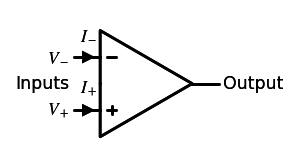

In [18]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='opamp.svg') as d:
    d += (O1 := elm.Opamp(leads=True).label('Inputs', loc='left').label('Output', loc='right').label('$V_-$', loc='in1').label('$V_+$', loc='in2'))
    d += elm.CurrentLabelInline(direction='in', ofst=-0.5).at(O1.in1).label('$I_-$')
    d += elm.CurrentLabelInline(direction='in', ofst=-0.5).at(O1.in2).label('$I_+$')    

```{figure} opamp.svg
---
height: 300px
name: opamp
---
```

**Assumptions about an ideal op-amp:**

- The voltage at the input nodes are equal ($V_+ = V_-$)
- No current enters or leaves the inputs ($I_+ = I_- = 0$)

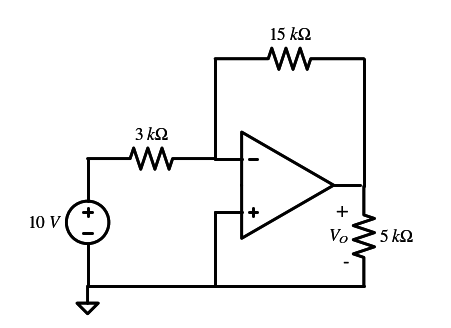

In [19]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='opamp-dc-gain.svg') as d:
    d += (O1 := elm.Opamp(leads=True))
    d += (R1 := elm.Resistor().left().label('$3~k\Omega$').at(O1.in1))
    d += elm.SourceV().label('$10~V$').down().reverse()
    d += elm.GroundSignal()
    d += elm.Line().right()
    d.push()
    d += elm.Line().up().length(1.75)
    d.pop()
    d += elm.Line().right().length(3.5)
    d += (R2 := elm.Resistor().up().label(['-','$V_O$','+']).label('$5~k\Omega$', loc='bot').length(2.35))
    d += elm.Line().up()
    d += (R3 := elm.Resistor().left().label('$15~k\Omega$').length(3.5))
    d += elm.Line().down().length(2.35)

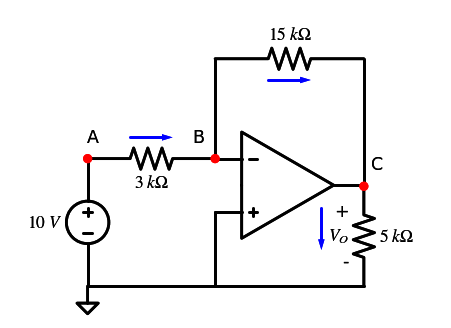

In [20]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='opamp-dc-gain-currents.svg') as d:
    d += (O1 := elm.Opamp(leads=True).label('B', loc='in1', ofst=(-0.25,0.5)).label('C', loc='out', ofst=(0.25,0.5)))
    d += elm.Dot().color('red').at(O1.in1)
    d += (R1 := elm.Resistor().left().label('$3~k\Omega$', loc='bot').at(O1.in1).label('A', loc='left', ofst=(-0.25,-0.5)))
    d += elm.Dot().color('red')
    d += elm.SourceV().label('$10~V$').down().reverse()
    d += elm.GroundSignal()
    d += elm.Line().right()
    d.push()
    d += elm.Line().up().length(1.75)
    d.pop()
    d += elm.Line().right().length(3.5)
    d += (R2 := elm.Resistor().up().label(['-','$V_O$','+']).label('$5~k\Omega$', loc='bot').length(2.35))
    d += elm.Dot().color('red')
    d += elm.Line().up()
    d += (R3 := elm.Resistor().left().label('$15~k\Omega$').length(3.5))
    d += elm.Line().down().length(2.35)
    d.move_from(R1.end, 1, 0.5)
    d += elm.Arrow().length(1).color('blue').right()
    d.move_from(R3.end, 1.25, -0.5)
    d += elm.Arrow().length(1).color('blue').right() 
    d.move_from(R2.end, -1, -0.5)
    d += elm.Arrow().length(1).color('blue').down()  

`````{admonition} Example

Find $V_O$ using nodal analysis

```{figure} opamp-dc-gain.svg
---
height: 300px
name: opamp-dc-gain
---
```

This is a circuit that you could easily look up in a book, apply the given equations, and find whatever value you seek. However, if you don't know where to find such a reference, or if the circuit is altered even slightly, this approach will fail. Instead, we can use the assumptions stated above and our knowledge of nodal analysis to develop a system of equations. We can then solve that system as we have previously to find the node voltages and any other values we need.

````{admonition} Solution
:class: tip, dropdown
The circuit has three non-reference nodes which I will label below. Just as before, the voltage supply leads us to write a KVL equation in place of one of the KCL equations. In a circuit with op-amps we also replace a KCL equation with a KVL for each op-amp. That KVL will reflect the first assumption stated above. Therefore, the system of equations for this analysis will consist of a KVL for the voltage supply, a KVL for the op-amp, and another KCL for one of the nodes.

Let's start by annotating the circuit just as before. The op-amp is not a passive component and therefore we do not assign it a current direction.

```{figure} opamp-dc-gain-currents.svg
---
height: 300px
name: opamp-dc-gain-currents
---
```


**KVL for Node A**


$$
V_A-0=10~\text{V}
$$


$$
V_A=10~\text{V}
$$


**KVL for Op-amp**


$$
V_B=0~\text{V}
$$


**KCL for Node B**


$$
\frac{V_A-V_B}{3k}-\frac{V_B-V_C}{15k}-0=0
$$


$$
\frac{1}{3k}V_A+\left[-\frac{1}{3k}-\frac{1}{15k}\right]V_B+\frac{1}{15k}V_C=0
$$


**Solve the System**

Let's gather the results of the three equations written above
\begin{alignat}{3}
V_A&&&=10~\text{V}\nonumber\\
~&~~~~~~~\text{V}_B&~&=0~\text{V}\nonumber\\%there has got to be a better way to align this
\frac{1}{3k}V_A&-\frac{6}{15k}&V_B+\frac{1}{15k}V_C&=0~\text{A}\nonumber
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrr}
1&0&0\\
0&1&0\\
\frac{1}{3k}&-\frac{6}{15k}&\frac{1}{15k}
\end{array} \right]^{-1}\left[\begin{array}{r}10~\text{V}\\0~\text{V}\\0~\text{A}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}10~\text{V}\\0~\text{V}\\-50~\text{V}\end{array}\right]
$$


**Find other values**


$$
V_O=V_C-0=-50-0=-50~\text{V}
$$


````
`````

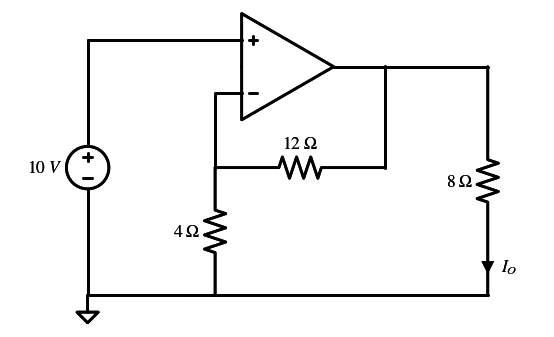

In [21]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='opamp-positive.svg') as d:
    d += (O1 := elm.Opamp(leads=True).flip())
    d += (L1 := elm.Line().left().at(O1.in2))
    d += elm.SourceV().label('$10~V$').down().reverse().length(6)
    d += elm.GroundSignal()
    d += elm.Line().right()
    d += (R1 := elm.Resistor().up().label('$4~\Omega$'))
    d.push()
    d += elm.Line().up().length(1.7)
    d.pop()
    d += (R2:= elm.Resistor().right().label('$12~\Omega$').length(4))
    d += elm.Line().up().length(2.4)
    d += elm.Line().right().at(O1.out)
    d += (R3:= elm.Resistor().down().label('$8~\Omega$').length(5.375))
    d += elm.CurrentLabelInline(direction='in', ofst=0.5).at(R3.end).label('$I_O$', loc='bot')
    d += elm.Line().left().length(7)

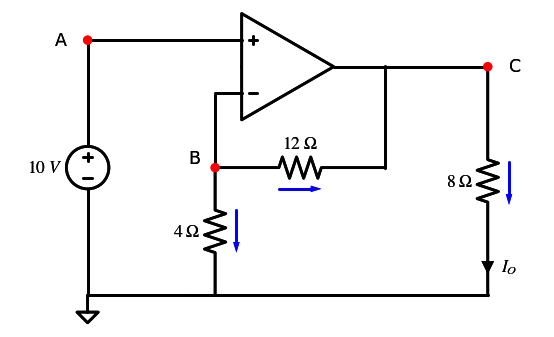

In [22]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='opamp-positive-currents.svg') as d:
    d += (O1 := elm.Opamp(leads=True).flip())
    d += (L1 := elm.Line().left().at(O1.in2).label('A', loc='left', ofst=(0.5,0)))
    d += elm.Dot().color('red')    
    d += elm.SourceV().label('$10~V$').down().reverse().length(6)
    d += elm.GroundSignal()
    d += elm.Line().right()
    d += (R1 := elm.Resistor().up().label('$4~\Omega$').label('B', loc='right', ofst=(0,0.5)))
    d += elm.Dot().color('red')    
    d.push()
    d += elm.Line().up().length(1.7)
    d.pop()
    d += (R2:= elm.Resistor().right().label('$12~\Omega$').length(4))
    d += elm.Line().up().length(2.4)
    d += elm.Line().right().at(O1.out).label('C', loc='right', ofst=(0.5,0))
    d += elm.Dot().color('red')    
    d += (R3:= elm.Resistor().down().label('$8~\Omega$').length(5.375))
    d += elm.CurrentLabelInline(direction='in', ofst=0.5).at(R3.end).label('$I_O$', loc='bot')
    d += elm.Line().left().length(7)
    d.move_from(R1.end, 0.5, -1)
    d += elm.Arrow().color('blue').down().length(1)
    d.move_from(R2.start, 1.5, -0.5)
    d += elm.Arrow().color('blue').right().length(1)
    d.move_from(R3.start, 0.5, -2.25)
    d += elm.Arrow().color('blue').down().length(1)

`````{admonition} Example


```{figure} opamp-positive.svg
---
height: 300px
name: opamp-positive
---
```

````{admonition} Solution
:class: tip, dropdown


```{figure} opamp-positive-currents.svg
---
height: 300px
name: opamp-positive-currents
---
```


**KVL for node A**


$$
V_A-0=10~\text{V}
$$


$$
V_A=10~\text{V}
$$


**KVL for op-amp**


$$
V_A=V_B
$$


$$
V_A-V_B=0
$$


**KCL for node B**


$$
-\frac{V_B-0}{4}-\frac{V_B-V_C}{12}-0=0~\text{A}
$$


$$
\left[-\frac{1}{4}-\frac{1}{12}\right]V_B+\frac{1}{12}V_C=0~\text{A}
$$


**Solve the System**

Let's gather the results of the three equations written above
\begin{alignat}{3}
V_A&&&=10~\text{V}\nonumber\\
V_A&-V_B&~&=0~\text{V}\nonumber\\%there has got to be a better way to align this
~&-\frac{1}{3}&V_B+\frac{1}{12}V_C&=0~\text{A}\nonumber
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrr}
1&0&0\\
1&-1&0\\
0&-\frac{1}{3}&\frac{1}{12}
\end{array} \right]^{-1}\left[\begin{array}{r}10~\text{V}\\0~\text{V}\\0~\text{A}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\end{array}\right]=\left[\begin{array}{r}10~\text{V}\\0~\text{V}\\40~\text{V}\end{array}\right]
$$


**Find other values**


$$
I_O=\frac{V_C-0}{8}=\frac{40-0}{8}=5~\text{A}
$$

````

`````

`````{admonition} Example


```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE25
---
```


````{admonition} Solution
:class: tip, dropdown


```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE26
---
```


**KVL for node A**


$$
V_A-0=2~\text{V}
$$


$$
V_A=2~\text{V}
$$


**KCL for node B**


$$
\frac{V_A-V_B}{R_1}-\frac{V_B-V_C}{R_2}+\frac{V_D-V_B}{R_4}=0~\text{A}
$$


$$
\frac{1}{R_1}V_A+\left[-\frac{1}{R_1}-\frac{1}{R_2}-\frac{1}{R_4}\right]V_B+\frac{1}{R_2}V_C+\frac{1}{R_4}V_D=0~\text{A}
$$


$$
\frac{1}{4k}V_A-\frac{83}{140k}V_B+\frac{1}{7k}V_C+\frac{1}{5k}V_D=0~\text{A}
$$
%FIX ME

**KCL for node C**


$$
\frac{V_B-V_C}{R_2}-\frac{V_C-0}{R_3}+0=0~\text{A}
$$


$$
\frac{1}{R_2}V_B+\left[-\frac{1}{R_2}-\frac{1}{R_3}\right]V_C=0~\text{A}
$$


$$
\frac{1}{7k}V_B-\frac{17}{70k}V_C=0~\text{A}
$$


**KVL for op-amp**


$$
V_C=V_D
$$


$$
V_C-V_D=0
$$


**Solve the System**

Let's gather the results of the four equations written above
\begin{alignat}{4}
V_A&&&&=2~\text{V}\nonumber\\
\frac{1}{4k}V_A&-\frac{83}{140k}V_B&+\frac{1}{7k}V_C&+\frac{1}{5k}V_D&=0~\text{A}\nonumber\\%there has got to be a better way to align this
&\frac{1}{7k}V_B&-\frac{17}{70k}V_C&&=0~\text{A}\nonumber\\%there has got to be a better way to align this
&&V_C&-V_D&=0~\text{V}\nonumber\\
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrrr}
1&0&0&0\\
\frac{1}{4k}&-\frac{83}{140k}&\frac{1}{7k}&\frac{1}{5k}\\
0&\frac{1}{7k}&-\frac{17}{70k}&0\\
0&0&1&-1
\end{array} \right]^{-1}\left[\begin{array}{r}2~\text{V}\\0~\text{A}\\0~\text{A}\\0~\text{V}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\\V_D\end{array}\right]=\left[\begin{array}{r}2~\text{V}\\1.278~\text{V}\\751.9~\text{mV}\\751.9~\text{mV}\end{array}\right]
$$


**Find other values**


$$
I_O-I_{R4}-0=0
$$


$$
I_O=I_{R4}=\frac{V_D-V_B}{5k}=\frac{751.9~\text{mV}-1.278~\text{V}}{5k}=-105.3~\mu A
$$

How will this change if we connect a load resistor to the output?
````
`````

`````{admonition} Example

Find $I_O$

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE27
---
```


````{admonition} Solution
:class: tip, dropdown


```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE28
---
```


**KVL for super-node (A and B)**


$$
V_A-V_B=4~\text{V}
$$


**KCL for super-node (A and B)**


$$
-\frac{V_A-0}{6}-\frac{V_B-0}{9}-\frac{V_B-V_C}{18}=0~\text{A}
$$


$$
-\frac{1}{6}V_A+\left[-\frac{1}{9}-\frac{1}{18}\right]V_B+\frac{1}{18}V_C=0~\text{A}
$$


$$
-\frac{1}{6}V_A-\frac{1}{6}V_B+\frac{1}{18}V_C=0~\text{A}
$$


**KVL for op-amp**


$$
V_C=0~\text{V}
$$


**KCL for node C**


$$
\frac{V_B-V_C}{18}-\frac{V_C-V_D}{72}+0=0~\text{A}
$$


$$
\frac{1}{18}V_B+\left[-\frac{1}{18}-\frac{1}{72}\right]V_C+\frac{1}{72}V_D=0~\text{A}
$$


$$
\frac{1}{18}V_B-\frac{5}{72}V_C+\frac{1}{72}V_D=0~\text{A}
$$


**Solve the system**

Let's gather the results of the four equations written above
\begin{alignat}{4}
V_A&~-V_B&&&=4~\text{V}\nonumber\\
-\frac{1}{6}V_A&-\frac{1}{6}V_B&+\frac{1}{18}V_C&&=0~\text{A}\nonumber\\%there has got to be a better way to align this
&&V_C&&=0~\text{V}\nonumber\\
&\frac{1}{18}V_B&-\frac{5}{72}V_C&+\frac{1}{72}V_D&=0~\text{A}\nonumber
\end{alignat}
and put them in matrix form

$$
 \left[ \begin{array}{rrrr}
1&-1&0&0\\
-\frac{1}{6}&-\frac{1}{6}&\frac{1}{18}&0\\
0&0&1&0\\
0&\frac{1}{18}&-\frac{5}{72}&\frac{1}{72}
\end{array} \right]^{-1}\left[\begin{array}{r}4~\text{V}\\0~\text{A}\\0~\text{V}\\0~\text{A}\end{array}\right]=\left[\begin{array}{c}V_A\\V_B\\V_C\\V_D\end{array}\right]=\left[\begin{array}{r}2~\text{V}\\-2~\text{V}\\0~\text{V}\\8~\text{V}\end{array}\right]
$$


**Find other values**


$$
\frac{V_C-V_D}{72}+I_O-\frac{V_D-0}{12}=0
$$


$$
I_O=-\frac{0-8}{72}+\frac{8-0}{12}=\frac{7}{9}~\text{A}=777.8~\text{mA}
$$


````
`````

## The Shortcut

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE29
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE30
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE31
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE32
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE33
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE34
---
```

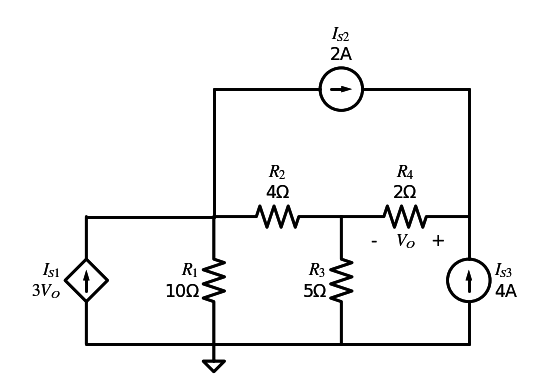

In [23]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-dependent-2.svg') as d:
    d += (Is1 := elm.SourceControlledI().up().label('$I_{S1}$\n$3V_O$'))
    d += (LineTL := elm.Line().right())
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n4Ω'))
    d += (R4 := elm.Resistor().right().label('$R_{4}$\n2Ω').label(('-','$V_O$','+'),loc='bottom'))
    d += (Is3 := elm.SourceI().down().label('$I_{S3}$\n4A',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(Is1.start))
    d += (R1 := elm.Resistor().at(R2.start).down().label('$R_{1}$\n10Ω'))
    d += (GndSig := elm.GroundSignal())
    d += (R3 := elm.Resistor().at(R2.end).down().label('$R_{3}$\n5Ω'))
    d += (LineL := elm.Line().at(R2.start).up())
    d += (Is2 := elm.SourceI().right().tox(Is3.start).label('$I_{S2}$\n2A',loc='top'))
    d += (LineR := elm.Line().down())

```{figure} nodal-dependent-2.svg
---
height: 300px
name: nodal-dependent-2
---
```

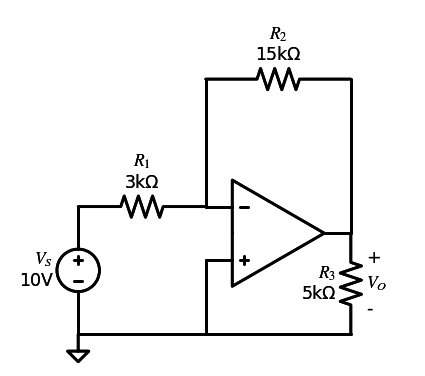

In [24]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-opamp-inverting.svg') as d:
    d += (op := elm.Opamp(leads=True))
    d += (R1 := elm.Resistor().at(op.in1).left().label('$R_{1}$\n3kΩ'))
    d += (Vs := elm.SourceV().down().reverse().label('$V_{S}$\n10V'))
    d += (LineIn2 := elm.Line().down().at(op.in2).toy(Vs.end))
    d += (LineIn1 := elm.Line().up().at(op.in1))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n15kΩ').tox(op.out))
    d += (LineOut := elm.Line().down().toy(op.out))
    d += (R3 := elm.Resistor().down().label('$R_{3}$\n5kΩ').toy(Vs.end).label(('+','$V_O$','-'),loc='bottom'))
    d += (LineB := elm.Line().left().tox(Vs.end))
    d += (GndSig := elm.GroundSignal())

```{figure} nodal-opamp-inverting.svg
---
height: 300px
name: nodal-opamp-inverting
---
```

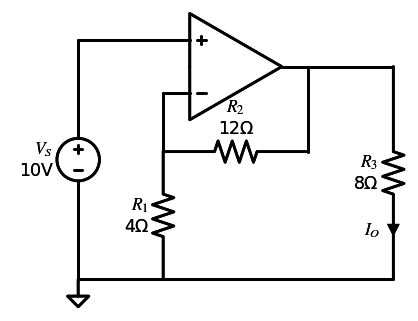

In [25]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-opamp-noninverting.svg') as d:
    d += (op := elm.Opamp(leads=True).flip())
    d += (LineOut1 := elm.Line().down().at(op.out).length(2))
    d += (R2 := elm.Resistor().left().tox(op.in1).label('$R_{2}$\n12Ω'))
    d += (LineIn1 := elm.Line().down().at(op.in1).toy(R2.end))
    d += (R1 := elm.Resistor().down().label('$R_{1}$\n4Ω'))
    d += (LineOpIn2 := elm.Line().at(op.in2).left().length(2))
    d += (Vs := elm.SourceV().down().reverse().toy(R1.end).label('$V_{S}$\n10V'))
    d += (LineOut2 := elm.Line().right().at(op.out).length(2))
    d += (R3 := elm.Resistor().down().toy(R1.end).label('$R_{3}$\n8Ω'))
    d += (LineB := elm.Line().left().tox(Vs.end))
    d += (GndSig := elm.GroundSignal())
    d += elm.CurrentLabelInline(direction='in',ofst=-1.5).at(R3).label('$I_O$')

```{figure} nodal-opamp-noninverting.svg
---
height: 300px
name: nodal-opamp-noninverting
---
```

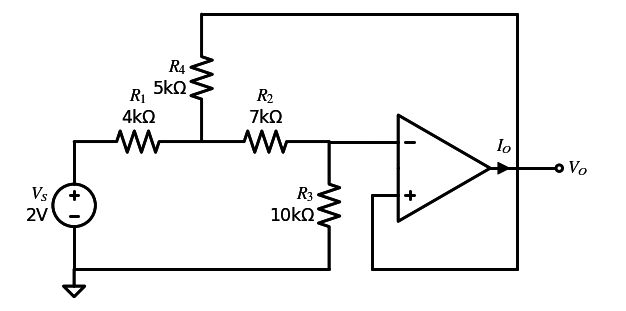

In [26]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-opamp-shortcut.svg') as d:
    d += (op := elm.Opamp(leads=True))
    d += (LineOpIn1 := elm.Line().at(op.in1).left().length(1))
    d += (R2 := elm.Resistor().left().label('$R_{2}$\n7kΩ'))
    d += (R1 := elm.Resistor().left().label('$R_{1}$\n4kΩ'))
    d += (Vs := elm.SourceV().down().label('$V_{S}$\n2V').reverse())
    d += (GndSig := elm.GroundSignal())
    d += (R3 := elm.Resistor().at(R2.start).down().label('$R_{3}$\n10kΩ'))
    d += (LineBL := elm.Line().left().tox(R1.end))
    d += (LineOpIn2 := elm.Line().at(op.in2).down().toy(Vs.end))
    d += (R4 := elm.Resistor().at(R2.end).up().label('$R_{4}$\n5kΩ'))
    d += (LineT := elm.Line().right().tox(op.out))
    d += (LineR := elm.Line().down().toy(R3.end))
    d += (LineBR := elm.Line().left().tox(LineOpIn2.end))
    d += elm.CurrentLabelInline(direction='out',ofst=-0.45).at(op.out).label('$I_O$')
    d += (LineOpOut := elm.Line().at(op.out).right().length(1))
    d += (vo := elm.Dot(open='True').label('$V_O$',loc='right'))

```{figure} nodal-opamp-shortcut.svg
---
height: 300px
name: nodal-opamp-shortcut
---
```

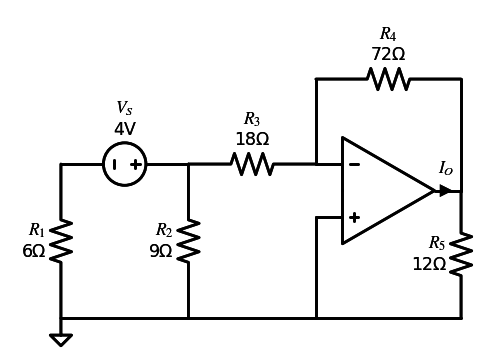

In [27]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='nodal-opamp-super-shortcut.svg') as d:
    d += (op := elm.Opamp(leads=True))
    d += (R3 := elm.Resistor().at(op.in1).left().label('$R_{3}$\n18Ω'))
    d += (Vs := elm.SourceV().left().label('$V_{S}$\n4V').reverse())
    d += (LineOpIn1 := elm.Line().at(op.in1).up().length(2))
    d += (R4 := elm.Resistor().right().label('$R_{4}$\n72Ω').tox(op.out))
    d += (LineR := elm.Line().down().toy(op.out))
    d += (R5 := elm.Resistor().down().label('$R_{5}$\n12Ω'))
    d += (R2 := elm.Resistor().at(R3.end).down().label('$R_{2}$\n9Ω').toy(R5.end))
    d += (LineOpIn2 := elm.Line().at(op.in2).down().toy(R5.end))
    d += (R1 := elm.Resistor().at(Vs.end).down().label('$R_{1}$\n6Ω').toy(R5.end))
    d += (GndSig := elm.GroundSignal())
    d += (LineB := elm.Line().right().tox(R5.end))
    d += elm.CurrentLabelInline(direction='in',ofst=0.2).at(op.out).label('$I_O$')

```{figure} nodal-opamp-super-shortcut.svg
---
height: 300px
name: nodal-opamp-super-shortcut
---
```

## Strategy for Nodal Analysis

The examples I've worked are intended to teach you how to deal with the little oddities that arise when performing nodal analysis. If you master these you will be able to analyze any linear electric circuits. I've also shown you how to use the "shortcut" to perform nodal analysis quickly. With practice you may be able to analyze most circuits simply by looking at the circuit and using your calculator to build the system of equations.

Not all circuits require you to use the techniques introduced here. When I first begin analysis of a circuit I look for certain conditions and I make a plan to deal with them. I will do my best to summarize the strategy I use when analyzing a circuit.

1.  **How many non-reference nodes?** Non-reference nodes are any nodes that are not the ground node. The number of non-reference nodes define how many unknowns will be part of the system and, therefore, how many equations you will have to write.
2.  **Are there voltage supplies?** Each voltage supply means you will write a KVL equation instead of a KCL. Also notice I say "voltage supply". I don't say "dependent supply" or "independent supply" since the type of voltage supply does not matter.
    1. **Is the voltage supply grounded on one side?** This is the simpler of the two conditions created by voltage supplies in the circuit. Just write a KVL for the voltage supply and skip the KCL for the node connected to the other side of the voltage supply.
    2. **Does the voltage supply connected to two non-reference nodes?** This condition creates a "super-node". The KVL is written in the same way as the previous case. The difference here is found in how you will write one of the KCLs. Rather than writing a KCL for a single node you will write a KCL for the region that bounds the two nodes on either side of the voltage supply.
3.  **Are there any operational amplifiers?** We use the two assumptions about ideal op-amps to complete the system of equations in this case. The first is that the voltages on the **inputs** of the op-amp are equal. This is included in the system as a KVL equation. This KVL replaces one of the KCL equations needed to complete the system. You'll still need to write enough KCL equations to complete the system. Find nodes that are not connected to 1) voltage supplies and 2) the **output** of the op-amp. Nodes connected to the inputs of the op-amp are fair game since we assume no current enters or leaves those inputs.
4.  **Are there any dependent supplies?** Look for diamond shaped supplies. It does not matter whether they are voltage or current supplies. Locate the control variable on the schematic and write an expression for it in terms of the unknown mesh currents. This expression is written in a similar manner to finding the output values of the analysis. You should use this expression anytime the control variable shows up in the system of equations.
5.  **Write the equations** If you've answered the questions above you should know which equations you will include in the system. Write them carefully and use good practice with regards to the signs and order of coefficients.
6.  **Solve the system** Matrix inversion works. So does row-reduced echelon form. If you'd like use software like MATLAB to solve the system. Just find the answer.
7.  **Find output of analysis** Once you know the node voltages you can find any other value in the circuit. The output of the analysis may take a few different forms.
    1.  **Is the value a voltage?** If the value is a voltage start with the node voltage on the positive side of the output. Subtract the node voltage on the negative side of the output.
    2.  **Is the value a current through a single passive component?** If the value is a current through a passive component use a combination of KVL and Ohm's law to find that voltage. Find the voltage as you did for the previous output type respecting passive sign convention for the labeled current direction. Use that voltage and the resistance (or impedance in later chapters) to find the current . This is useful for finding currents that are outputs of the analysis as well as finding currents that are intermediate values for the next type of output value.
    3.  **Is the value a current through a voltage supply or op-amp output?** If the value is a current through one of these components you can find it using a KCL at a node connected to the component. This means you have to find other currents using the previous method. Write a KCL at a node that includes the unknown current. Find all of the other currents entering/leaving the node. Solve for the unknown current.